In [1]:
import torch

torch.manual_seed(42)

device_id = 3
using = 0.4
device = torch.device(f"cuda:{device_id}" if torch.cuda.is_available() else "cpu")

# torch.cuda.set_per_process_memory_fraction(using, device_id)
# # GPU 메모리 사용 비율 설정

# torch.cuda.empty_cache()
# # GPU 캐시 비우기

# # 총 메모리가 얼마나 되는지 계산
# total_memory = torch.cuda.get_device_properties(device_id).total_memory

# # 49.9%의 GPU 메모리 사용
# tmp_tensor = torch.empty(int(total_memory * (using-0.001)), dtype=torch.int8, device=device)
# print(f'use:{tmp_tensor}')

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import WeightedRandomSampler

In [2]:
from LoadData import load_data, train_model, show_result

In [3]:
dataloaders_dict = load_data()

3379
Class: A, Count: 1401
Class: B, Count: 739
Class: C, Count: 695
Class: F, Count: 544
846
Class: A, Count: 351
Class: B, Count: 185
Class: C, Count: 175
Class: F, Count: 135


A  A  A  C  B  F  F  A


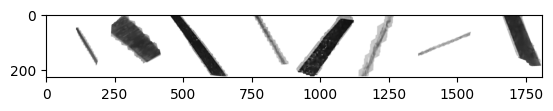

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# 이미지를 화면에 표시하기 위한 헬퍼 함수
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)  # 단일 채널(흑백)로 변환
    img = img / 2 + 0.5  # 정규화 해제 (unnormalize)
    npimg = img.numpy()  # 텐서를 numpy 배열로 변환
    if one_channel:
        plt.imshow(npimg, cmap="Greys")  # 흑백으로 표시
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))  # RGB로 표시

classes = ('A', 'B', 'C', 'F')  # 클래스 레이블 정의

dataiter = iter(dataloaders_dict['train'])  # 학습 데이터 로더에서 반복자 생성
images, labels = next(dataiter)  # 배치 데이터를 가져옴

# 배치에서 가져온 이미지를 격자로 변환하여 화면에 표시
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(8)))  # 배치에서 클래스 레이블 출력

In [5]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [7]:
use_pretrained= True
net = models.mobilenet_v3_small(pretrained=use_pretrained)

net.features[0][0] = nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
net.classifier[3] = nn.Linear(in_features=1024, out_features=4, bias=True)

optimizer = optim.SGD(params=net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
net = net.to(device)
# train_model 함수 실행
num_epochs = 50
result = train_model(net, dataloaders_dict, criterion, optimizer, 
                     num_epochs=num_epochs, save_model='./Model/mobilenet_v3_small.pth',
                     device=device)

Epoch 1/ 50
******************************


100%|██████████| 106/106 [00:06<00:00, 16.58it/s]


max val acc:0.23995271867612292, save in ./Model/mobilenet_v3_small.pth
val Loss 1.3847 Acc : 0.2400
Epoch 2/ 50
******************************


100%|██████████| 423/423 [00:42<00:00, 10.03it/s]


train Loss 1.0252 Acc : 0.5511


100%|██████████| 106/106 [00:09<00:00, 10.62it/s]


max val acc:0.2541371158392435, save in ./Model/mobilenet_v3_small.pth
val Loss 4.6143 Acc : 0.2541
Epoch 3/ 50
******************************


100%|██████████| 423/423 [00:42<00:00, 10.01it/s]


train Loss 0.7569 Acc : 0.6872


100%|██████████| 106/106 [00:07<00:00, 13.93it/s]


val Loss 4.2375 Acc : 0.2482
Epoch 4/ 50
******************************


100%|██████████| 423/423 [00:35<00:00, 11.92it/s]


train Loss 0.6551 Acc : 0.7381


100%|██████████| 106/106 [00:09<00:00, 11.09it/s]


max val acc:0.6394799054373522, save in ./Model/mobilenet_v3_small.pth
val Loss 0.8413 Acc : 0.6395
Epoch 5/ 50
******************************


100%|██████████| 423/423 [00:42<00:00,  9.90it/s]


train Loss 0.5678 Acc : 0.7739


100%|██████████| 106/106 [00:07<00:00, 14.76it/s]


val Loss 1.0064 Acc : 0.5591
Epoch 6/ 50
******************************


100%|██████████| 423/423 [00:39<00:00, 10.62it/s]


train Loss 0.5030 Acc : 0.8082


100%|██████████| 106/106 [00:10<00:00,  9.77it/s]


val Loss 1.2353 Acc : 0.5697
Epoch 7/ 50
******************************


100%|██████████| 423/423 [00:41<00:00, 10.31it/s]


train Loss 0.4485 Acc : 0.8257


100%|██████████| 106/106 [00:11<00:00,  9.37it/s]


val Loss 1.4051 Acc : 0.5355
Epoch 8/ 50
******************************


100%|██████████| 423/423 [00:45<00:00,  9.39it/s]


train Loss 0.3866 Acc : 0.8541


100%|██████████| 106/106 [00:10<00:00,  9.84it/s]


max val acc:0.7044917257683215, save in ./Model/mobilenet_v3_small.pth
val Loss 0.7990 Acc : 0.7045
Epoch 9/ 50
******************************


100%|██████████| 423/423 [00:47<00:00,  8.99it/s]


train Loss 0.3632 Acc : 0.8597


100%|██████████| 106/106 [00:08<00:00, 12.84it/s]


val Loss 1.1859 Acc : 0.5615
Epoch 10/ 50
******************************


100%|██████████| 423/423 [00:42<00:00, 10.02it/s]


train Loss 0.3275 Acc : 0.8784


100%|██████████| 106/106 [00:14<00:00,  7.08it/s]


val Loss 1.3121 Acc : 0.5733
Epoch 11/ 50
******************************


100%|██████████| 423/423 [00:47<00:00,  8.91it/s]


train Loss 0.3140 Acc : 0.8840


100%|██████████| 106/106 [00:09<00:00, 11.77it/s]


val Loss 1.0657 Acc : 0.6608
Epoch 12/ 50
******************************


100%|██████████| 423/423 [00:43<00:00,  9.78it/s]


train Loss 0.2834 Acc : 0.8896


100%|██████████| 106/106 [00:07<00:00, 13.44it/s]


max val acc:0.7742316784869976, save in ./Model/mobilenet_v3_small.pth
val Loss 0.6570 Acc : 0.7742
Epoch 13/ 50
******************************


100%|██████████| 423/423 [00:42<00:00,  9.98it/s]


train Loss 0.2506 Acc : 0.9003


100%|██████████| 106/106 [00:09<00:00, 11.54it/s]


max val acc:0.7872340425531915, save in ./Model/mobilenet_v3_small.pth
val Loss 0.5998 Acc : 0.7872
Epoch 14/ 50
******************************


100%|██████████| 423/423 [00:41<00:00, 10.14it/s]


train Loss 0.2160 Acc : 0.9162


100%|██████████| 106/106 [00:08<00:00, 12.40it/s]


val Loss 0.7005 Acc : 0.7470
Epoch 15/ 50
******************************


100%|██████████| 423/423 [00:38<00:00, 10.88it/s]


train Loss 0.1996 Acc : 0.9293


100%|██████████| 106/106 [00:07<00:00, 14.61it/s]


val Loss 0.6579 Acc : 0.7742
Epoch 16/ 50
******************************


100%|██████████| 423/423 [00:38<00:00, 10.87it/s]


train Loss 0.1924 Acc : 0.9260


100%|██████████| 106/106 [00:07<00:00, 14.97it/s]


val Loss 0.7943 Acc : 0.7234
Epoch 17/ 50
******************************


100%|██████████| 423/423 [00:38<00:00, 11.08it/s]


train Loss 0.1654 Acc : 0.9370


100%|██████████| 106/106 [00:08<00:00, 12.18it/s]


val Loss 0.9153 Acc : 0.7636
Epoch 18/ 50
******************************


100%|██████████| 423/423 [00:36<00:00, 11.46it/s]


train Loss 0.1428 Acc : 0.9485


100%|██████████| 106/106 [00:08<00:00, 12.80it/s]


val Loss 0.8186 Acc : 0.7541
Epoch 19/ 50
******************************


100%|██████████| 423/423 [00:35<00:00, 12.03it/s]


train Loss 0.1468 Acc : 0.9467


100%|██████████| 106/106 [00:07<00:00, 14.00it/s]


val Loss 0.6901 Acc : 0.7742
Epoch 20/ 50
******************************


100%|██████████| 423/423 [00:38<00:00, 11.05it/s]


train Loss 0.1212 Acc : 0.9577


100%|██████████| 106/106 [00:08<00:00, 12.02it/s]


val Loss 1.3720 Acc : 0.5035
Epoch 21/ 50
******************************


100%|██████████| 423/423 [00:40<00:00, 10.55it/s]


train Loss 0.1314 Acc : 0.9529


100%|██████████| 106/106 [00:08<00:00, 13.06it/s]


val Loss 1.2918 Acc : 0.6005
Epoch 22/ 50
******************************


100%|██████████| 423/423 [00:37<00:00, 11.13it/s]


train Loss 0.0983 Acc : 0.9692


100%|██████████| 106/106 [00:10<00:00, 10.49it/s]


val Loss 0.9728 Acc : 0.6903
Epoch 23/ 50
******************************


100%|██████████| 423/423 [00:39<00:00, 10.83it/s]


train Loss 0.1265 Acc : 0.9568


100%|██████████| 106/106 [00:07<00:00, 13.67it/s]


max val acc:0.7919621749408984, save in ./Model/mobilenet_v3_small.pth
val Loss 0.7266 Acc : 0.7920
Epoch 24/ 50
******************************


100%|██████████| 423/423 [00:34<00:00, 12.41it/s]


train Loss 0.0952 Acc : 0.9651


100%|██████████| 106/106 [00:07<00:00, 14.45it/s]


val Loss 1.1979 Acc : 0.6501
Epoch 25/ 50
******************************


100%|██████████| 423/423 [00:34<00:00, 12.38it/s]


train Loss 0.1018 Acc : 0.9657


100%|██████████| 106/106 [00:06<00:00, 15.32it/s]


max val acc:0.7955082742316785, save in ./Model/mobilenet_v3_small.pth
val Loss 0.6729 Acc : 0.7955
Epoch 26/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.50it/s]


train Loss 0.0828 Acc : 0.9686


100%|██████████| 106/106 [00:03<00:00, 27.92it/s]


max val acc:0.7990543735224586, save in ./Model/mobilenet_v3_small.pth
val Loss 0.6943 Acc : 0.7991
Epoch 27/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.48it/s]


train Loss 0.0818 Acc : 0.9713


100%|██████████| 106/106 [00:03<00:00, 28.88it/s]


val Loss 0.7081 Acc : 0.7991
Epoch 28/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.69it/s]


train Loss 0.0813 Acc : 0.9722


100%|██████████| 106/106 [00:03<00:00, 29.61it/s]


val Loss 1.2640 Acc : 0.6856
Epoch 29/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.55it/s]


train Loss 0.0785 Acc : 0.9751


100%|██████████| 106/106 [00:03<00:00, 28.55it/s]


val Loss 1.1667 Acc : 0.7352
Epoch 30/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.66it/s]


train Loss 0.0584 Acc : 0.9799


100%|██████████| 106/106 [00:03<00:00, 28.50it/s]


max val acc:0.8191489361702128, save in ./Model/mobilenet_v3_small.pth
val Loss 0.6891 Acc : 0.8191
Epoch 31/ 50
******************************


100%|██████████| 423/423 [00:22<00:00, 19.04it/s]


train Loss 0.0467 Acc : 0.9858


100%|██████████| 106/106 [00:03<00:00, 28.50it/s]


val Loss 0.7130 Acc : 0.8109
Epoch 32/ 50
******************************


100%|██████████| 423/423 [00:23<00:00, 17.73it/s]


train Loss 0.0539 Acc : 0.9819


100%|██████████| 106/106 [00:04<00:00, 25.30it/s]


val Loss 0.8322 Acc : 0.7991
Epoch 33/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.35it/s]


train Loss 0.0449 Acc : 0.9870


100%|██████████| 106/106 [00:03<00:00, 27.05it/s]


max val acc:0.8451536643026004, save in ./Model/mobilenet_v3_small.pth
val Loss 0.6486 Acc : 0.8452
Epoch 34/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.38it/s]


train Loss 0.0675 Acc : 0.9763


100%|██████████| 106/106 [00:03<00:00, 28.33it/s]


val Loss 0.7836 Acc : 0.8180
Epoch 35/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.50it/s]


train Loss 0.0424 Acc : 0.9864


100%|██████████| 106/106 [00:03<00:00, 29.31it/s]


val Loss 0.7021 Acc : 0.8050
Epoch 36/ 50
******************************


100%|██████████| 423/423 [00:22<00:00, 18.90it/s]


train Loss 0.0490 Acc : 0.9861


100%|██████████| 106/106 [00:03<00:00, 28.08it/s]


val Loss 0.6015 Acc : 0.8392
Epoch 37/ 50
******************************


100%|██████████| 423/423 [00:22<00:00, 19.06it/s]


train Loss 0.0479 Acc : 0.9837


100%|██████████| 106/106 [00:03<00:00, 28.58it/s]


val Loss 0.7561 Acc : 0.8156
Epoch 38/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.29it/s]


train Loss 0.0411 Acc : 0.9858


100%|██████████| 106/106 [00:03<00:00, 28.60it/s]


val Loss 1.0355 Acc : 0.7400
Epoch 39/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.39it/s]


train Loss 0.0512 Acc : 0.9814


100%|██████████| 106/106 [00:03<00:00, 29.37it/s]


val Loss 0.9020 Acc : 0.7683
Epoch 40/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.27it/s]


train Loss 0.0476 Acc : 0.9825


100%|██████████| 106/106 [00:03<00:00, 28.35it/s]


val Loss 0.7176 Acc : 0.8251
Epoch 41/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.46it/s]


train Loss 0.0368 Acc : 0.9882


100%|██████████| 106/106 [00:03<00:00, 26.86it/s]


val Loss 0.9237 Acc : 0.8333
Epoch 42/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.81it/s]


train Loss 0.0236 Acc : 0.9929


100%|██████████| 106/106 [00:03<00:00, 28.33it/s]


val Loss 0.8494 Acc : 0.8333
Epoch 43/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.76it/s]


train Loss 0.0334 Acc : 0.9888


100%|██████████| 106/106 [00:04<00:00, 25.08it/s]


val Loss 1.5673 Acc : 0.6879
Epoch 44/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.31it/s]


train Loss 0.0425 Acc : 0.9843


100%|██████████| 106/106 [00:03<00:00, 27.27it/s]


val Loss 0.7141 Acc : 0.8404
Epoch 45/ 50
******************************


100%|██████████| 423/423 [00:22<00:00, 19.16it/s]


train Loss 0.0398 Acc : 0.9870


100%|██████████| 106/106 [00:04<00:00, 25.10it/s]


val Loss 0.8369 Acc : 0.8168
Epoch 46/ 50
******************************


100%|██████████| 423/423 [00:24<00:00, 17.59it/s]


train Loss 0.0335 Acc : 0.9873


100%|██████████| 106/106 [00:03<00:00, 28.49it/s]


max val acc:0.8475177304964538, save in ./Model/mobilenet_v3_small.pth
val Loss 0.6123 Acc : 0.8475
Epoch 47/ 50
******************************


100%|██████████| 423/423 [00:22<00:00, 19.04it/s]


train Loss 0.0248 Acc : 0.9917


100%|██████████| 106/106 [00:03<00:00, 29.21it/s]


val Loss 0.9017 Acc : 0.8180
Epoch 48/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.58it/s]


train Loss 0.0344 Acc : 0.9879


100%|██████████| 106/106 [00:03<00:00, 29.06it/s]


val Loss 0.6935 Acc : 0.8274
Epoch 49/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.43it/s]


train Loss 0.0362 Acc : 0.9885


100%|██████████| 106/106 [00:03<00:00, 28.39it/s]


val Loss 1.1065 Acc : 0.7139
Epoch 50/ 50
******************************


100%|██████████| 423/423 [00:21<00:00, 19.32it/s]


train Loss 0.0416 Acc : 0.9855


100%|██████████| 106/106 [00:03<00:00, 28.30it/s]

val Loss 0.7469 Acc : 0.8440


In [16]:
import matplotlib.pyplot as plt

def show_result(result):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(result['train loss'])+1), result['train loss'], c='b', label='train loss')
    plt.plot(range(1, len(result['val loss'])+1), result['val loss'], c='r', label='val loss')
    plt.xlabel('epoch')
    plt.ylabel('loss', rotation=0)
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(result['train acc'])+1), result['train acc'], c='b', label='train acc')
    plt.plot(range(1, len(result['val acc'])+1), result['val acc'], c='r', label='val acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy', rotation=0)
    plt.title('Accuracy')
    plt.ylim([0, 1.0])
    
    plt.legend()
    
    plt.show()

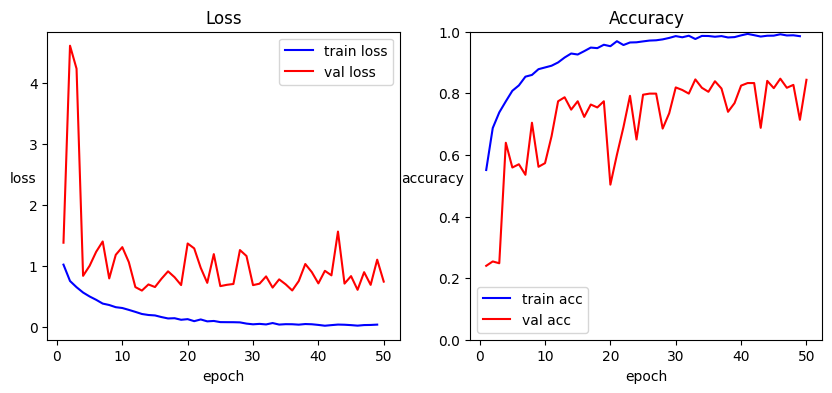

In [17]:
show_result(result)

In [18]:
import json

# 딕셔너리를 JSON 파일로 저장
with open('./Model/mobilenet_v3_small.json', 'w') as f:
    json.dump(result, f)